# Google

In [1]:
import pandas as pd
import numpy as np
import re

import_google = pd.read_csv('output_Google.csv')
import_google.drop(import_google[import_google['Cost'] == 0].index, inplace=True)

blank_percentages_google = import_google.apply(lambda col: (col.isna() | (col.astype(str).str.strip() == '')).mean() * 100)
blank_summary_google = pd.DataFrame([blank_percentages_google.round(2)], index=['% Blank'])
print(blank_summary_google)
print(import_google.dtypes)

         Date  Account  Campaign name  Audience  Impressions  Clicks  Cost  \
% Blank   0.0      0.0            0.0       0.0          0.0     0.0   0.0   

         Engagements  Watch 100% views  Video impressions  Video views  \
% Blank          0.0               0.0              99.83          0.0   

         Conversions  Interactions  
% Blank          0.0           0.0  
Date                  object
Account               object
Campaign name         object
Audience              object
Impressions            int64
Clicks                 int64
Cost                 float64
Engagements            int64
Watch 100% views       int64
Video impressions    float64
Video views            int64
Conversions          float64
Interactions           int64
dtype: object


## Non log

In [3]:
import pandas as pd
import numpy as np
import re

#Change data type
import_google['Date'] = pd.to_datetime(import_google['Date'], errors='coerce')
import_google['Account'] = import_google['Account'].astype('string')
import_google['Campaign name'] = import_google['Campaign name'].astype('string')
import_google['Audience'] = import_google['Audience'].astype('string')
import_google['Account'] = import_google['Account'].astype('string')
import_google['Video Impressions'] = import_google['Video impressions'].fillna(0)

df_google = pd.DataFrame()

#Functions
def google_extract_category(campaign):
    # Try pattern 1: between | and -
    match_pipe = re.search(r'\|\s*(.*?)\s*-', campaign)
    if match_pipe:
        return match_pipe.group(1).strip()

    # Try pattern 2: between ] and -
    match_bracket = re.search(r'\]\s*(.*?)\s*-', campaign)
    if match_bracket:
        return match_bracket.group(1).strip()

    # Fallback
    return 'Update Required'

df_google['Date'] = import_google['Date']

df_google['Campaign'] = import_google['Campaign name']
df_google['Campaign'] = df_google['Campaign'].str.replace(r'\s+l\s+', ' | ', regex=True)
df_google['Campaign'] = df_google['Campaign'].str.replace('_', ' | ', regex=True)
df_google['Campaign Title'] = df_google['Campaign'].str.extract(r'-\s*(.*?)\s*\|')
df_google['Campaign Category'] = df_google['Campaign'].apply(google_extract_category)
df_google['Campaign Stage'] = np.where(df_google['Campaign'].str.startswith('[SEM] UNIFI Business'),df_google['Campaign'].str.split('|').str[1].str.strip(),df_google['Campaign'].str.split('|').str[2].str.strip())
df_google['Campaign Objective'] = np.where(df_google['Campaign'].str.startswith('[SEM] UNIFI Business'),df_google['Campaign'].str.split('|').str[2].str.strip(),df_google['Campaign'].str.split('|').str[3].str.strip())
df_google['Campaign Platform'] = np.where(df_google['Campaign'].str.startswith('[SEM]'),'SEM','YouTube')
df_google['Audience'] = import_google['Audience']
df_google['Advertising Type'] = np.where(import_google['Video views'] == 0, 'Ad Post', 'Ad Video')
df_google['Cost'] = import_google['Cost'] 
df_google['Impressions'] = import_google['Impressions'] 
df_google['Clicks'] = import_google['Clicks'] 
df_google['Engagements'] = import_google['Engagements'] 
df_google['Interactions'] = import_google['Interactions'] 
df_google['Video Impressions'] = import_google['Video impressions']
df_google['Video Views'] = import_google['Video views'] 
df_google['Video Completions'] = import_google['Watch 100% views']
df_google['Conversions'] = import_google['Conversions'] 
df_google['Campaign Objective'] = df_google['Campaign Objective'].apply(
    lambda x: 'Conversion' if isinstance(x, str) and 'conversion' in x.lower() else x
)


df_google['CPM'] = np.where(df_google['Impressions'] > 0, (df_google['Cost'] / df_google['Impressions']) * 1000, 0)
df_google['CPC'] = np.where(df_google['Clicks'] > 0, (df_google['Cost'] / df_google['Clicks']), 0)
df_google['CPV'] = np.where(df_google['Video Views'] > 0, (df_google['Cost'] / df_google['Video Views']), 0)
df_google['CPVC'] = np.where(df_google['Video Completions'] > 0, (df_google['Cost'] / df_google['Video Completions']), 0)
df_google['CTR'] = np.where(df_google['Impressions'] > 0, (df_google['Clicks'] / df_google['Impressions']) * 100, 0)
df_google['CPE'] = np.where(df_google['Engagements'] > 0, (df_google['Cost'] / df_google['Engagements']), 0)
df_google['CPCV'] = np.where(df_google['Conversions'] > 0, (df_google['Cost'] / df_google['Conversions']) * 100, 0)
df_google['CVR'] = np.where(df_google['Impressions'] > 0, (df_google['Conversions'] / df_google['Impressions']) * 100, 0)

df_google['Date'] = pd.to_datetime(df_google['Date'], errors='coerce')
df_google['Week'] = df_google['Date'].dt.to_period('W').apply(lambda r: r.start_time)
df_google['Month'] = df_google['Date'].dt.strftime('%b')
df_google['Year'] = df_google['Date'].dt.year
df_google.drop(df_google[df_google['Cost'] == 0].index, inplace=True)

df_google.to_csv('df_google_nonlog.csv', index=False)

## Log

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('df_google_nonlog.csv')
# print(df.columns)

#Log positive/left skew 
df['Cost'] = np.log1p(df['Cost'])
df['Impressions'] = np.log1p(df['Impressions'])
df['Clicks'] = np.log1p(df['Clicks'])
df['Engagements'] = np.log1p(df['Engagements'])
df['Interactions'] = np.log1p(df['Interactions'])
df['Video Impressions'] = np.log1p(df['Video Impressions'])
df['Video Completions'] = np.log1p(df['Video Completions'])
df['Conversions'] = np.log1p(df['Conversions'])
df['CPM'] = np.log1p(df['CPM'])
df['CPC'] = np.log1p(df['CPC'])
df['CPV'] = np.log1p(df['CPV'])
df['CPVC'] = np.log1p(df['CPVC'])
df['CTR'] = np.log1p(df['CTR'])
df['CPE'] = np.log1p(df['CPE'])
df['CPCV'] = np.log1p(df['CPCV'])
df['CVR'] = np.log1p(df['CVR'])

# Histogram
# plt.figure(figsize=(8, 4))
# plt.hist(df['CVR'], bins=30)
# plt.title("Normal metric")
# plt.xlabel("Metric")
# plt.ylabel("Frequency")
# plt.show()
# plt.figure(figsize=(8, 4))
# plt.hist(df['CVR'], bins=30)
# plt.title("Normal metric")
# plt.xlabel("Metric")
# plt.ylabel("Frequency")
# plt.show()

df.to_csv('df_google_log.csv', index=False)

# Meta

In [68]:
import_meta   = pd.read_csv('output_Meta.csv')
import_meta.drop(import_meta[import_meta['Cost'] == 0].index, inplace=True)

blank_percentages_meta = import_meta.apply(lambda col: (col.isna() | (col.astype(str).str.strip() == '')).mean() * 100)
blank_summary_meta = pd.DataFrame([blank_percentages_meta.round(2)], index=['% Blank'])

print(blank_summary_meta)
print(import_meta.dtypes)

         Date  Publisher platform  Campaign name  Reach  Frequency  \
% Blank   0.0                 0.0            0.0    0.0       2.45   

         Impressions  Actions  Cost  Post engagements  Link clicks  \
% Blank          0.0      0.0   0.0               8.2        12.88   

         Video watches at 100%  ThruPlay actions  Landing page views  
% Blank                  37.26             36.42               20.56  
Date                      object
Publisher platform        object
Campaign name             object
Reach                     object
Frequency                float64
Impressions              float64
Actions                    int64
Cost                     float64
Post engagements         float64
Link clicks              float64
Video watches at 100%    float64
ThruPlay actions         float64
Landing page views       float64
dtype: object


## Non log

In [69]:
import pandas as pd
import numpy as np
import re

import_meta = import_meta[import_meta['Reach'].astype(str).str.fullmatch(r'\d+')]
#Change data type
import_meta['Date'] = pd.to_datetime(import_meta['Date'], errors='coerce')
import_meta['Publisher platform'] = import_meta['Publisher platform'].astype('string')
import_meta['Campaign name'] = import_meta['Campaign name'].astype('string')
import_meta['Reach'] = import_meta['Reach'].astype(np.int64)

import_meta = import_meta.dropna(subset=['Post engagements'])
import_meta = import_meta.dropna(subset=['Frequency'])
import_meta['Link clicks'] = import_meta['Link clicks'].fillna(0)
import_meta['Video watches at 100%'] = import_meta['Video watches at 100%'].fillna(0)
import_meta['ThruPlay actions'] = import_meta['ThruPlay actions'].fillna(0)
import_meta['Landing page views'] = import_meta['Landing page views'].fillna(0)

df_meta = pd.DataFrame()

#Functions
platforms = list(import_meta['Publisher platform'].drop_duplicates())

meta_platform_map = {
    'instagram': 'Instagram',
    'facebook': 'Facebook',
    'unknown': 'Unknown',
    'messenger': 'Messenger',
    'audience_network': 'Audience Network'
}

def meta_standardise_funnel(stage):
    if stage is None:
        return None
    stage_lower = stage.lower()
    if 'top' in stage_lower:
        return 'Top Funnel'
    elif 'mid' in stage_lower or 'middle' in stage_lower:
        return 'Mid Funnel'
    elif 'bottom' in stage_lower:
        return 'Bottom Funnel'
    else:
        return 'Error'

def meta_map_channel(channel):
    return meta_platform_map.get(channel, channel)

def meta_extract_campaign_title(campaign):
    parts = [p.strip() for p in campaign.split('|')]
    
    # Case 1: MMU and contains "intake"
    if campaign.startswith('MMU') and 'intake' in campaign.lower():
        for part in parts:
            if 'intake' in part.lower():
                return part
        return parts[4] if len(parts) > 4 else None

    # Case 2: Second part is a number
    elif len(parts) > 2 and parts[1].isdigit():
        return parts[2]

    # Case 3: Default to second part
    return parts[1] if len(parts) > 1 else None

def meta_standardise_objective(objective):
    if 'conversion' in objective.lower() or 'conversions' in objective.lower():
        return 'Conversion'
    
    elif 'reach' in objective.lower() or 'rnf' in objective.lower():
        return 'Reach'
    
    elif 'lead' in objective.lower():
        return 'Lead Gen'
    
    elif 'videoview' in objective.lower() or 'thruplays' in objective.lower():
        return 'Video Views'
    
    else:
        return objective

def conversions_meta(conversion):
    if 'Reach' in conversion.lower():
        return 'N/A'
    
    elif 'Video Viewws' in conversion.lower():
        return df_meta['Video Views']
    
    elif 'Conversion' in conversion.lower():
        return df_meta['Actions']
    
    elif 'Traffic' in conversion.lower():
        return df_meta['Click']
    
    elif 'Landing Page Views' in conversion.lower():
        return df_meta['Landing Page Views']
    
    elif 'Retargeting' in conversion.lower():
        return df_meta['Engagements']
    
    elif 'Lead Gen' in conversion.lower():
        return df_meta['Actions']
    
    elif 'Engagement' in conversion.lower():
        return df_meta['Engagements']
    
    else:
        return df_meta['Video Views']

df_meta['Date'] = import_meta['Date']
df_meta['Campaign'] = import_meta['Campaign name']
df_meta['Campaign'] = df_meta['Campaign'].str.replace(r'\s+l\s+', ' | ', regex=True)
df_meta['Campaign'] = df_meta['Campaign'].str.replace('_', ' | ', regex=True)
df_meta['Campaign Title'] = df_meta['Campaign'].apply(meta_extract_campaign_title)
df_meta['Campaign Category'] = df_meta['Campaign'].str.split('|').str[0].str.strip()
df_meta['Campaign Stage'] = df_meta['Campaign'].apply(lambda x: next((part.strip() for part in x.split('|') if 'funnel' in part.lower()), None))
df_meta['Campaign Stage'] = df_meta['Campaign Stage'].apply(meta_standardise_funnel)
df_meta['Campaign Objective'] = df_meta['Campaign'].apply(lambda x: x.split('|')[2].strip() if x.strip().startswith('MMU') else x.split('|')[-1].strip())
df_meta['Campaign Objective'] = df_meta['Campaign Objective'].apply(meta_standardise_objective)
df_meta['Campaign Platform'] = import_meta['Publisher platform'].apply(meta_map_channel)
df_meta['Cost'] = import_meta['Cost'] 
df_meta['Impressions'] = import_meta['Impressions'] 

df_meta['Reach'] = import_meta['Reach']
df_meta['Frequency'] = import_meta['Frequency']
df_meta['Actions'] = import_meta['Actions']
df_meta['Post Engagements'] = import_meta['Post engagements']
df_meta['Link Clicks'] = import_meta['Link clicks']
df_meta['Video Completions'] = import_meta['Video watches at 100%']
df_meta['ThruPlay Actions'] = import_meta['ThruPlay actions']
df_meta['Landing Page Views'] = import_meta['Landing page views']

df_meta['CPM'] = np.where(df_meta['Impressions'] > 0, (df_meta['Cost'] / df_meta['Impressions']) * 1000, 0)
df_meta['CPC'] = np.where(df_meta['Link Clicks'] > 0, (df_meta['Cost'] / df_meta['Link Clicks']), 0)
df_meta['CPV'] = np.where(df_meta['ThruPlay Actions'] > 0, (df_meta['Cost'] / df_meta['ThruPlay Actions']), 0)
df_meta['CPVC'] = np.where(df_meta['Video Completions'] > 0, (df_meta['Cost'] / df_meta['Video Completions']), 0)
df_meta['CTR'] = np.where(df_meta['Impressions'] > 0, (df_meta['Link Clicks'] / df_meta['Impressions']) * 100, 0)
df_meta['CPE'] = np.where(df_meta['Actions'] > 0, (df_meta['Cost'] / df_meta['Actions']), 0)
df_meta['CPCV'] = np.where(df_meta['Actions'] > 0, (df_meta['Cost'] / df_meta['Actions']) * 100, 0)
df_meta['CVR'] = np.where(df_meta['Impressions'] > 0, (df_meta['Actions'] / df_meta['Impressions']) * 100, 0)

df_meta['Date'] = pd.to_datetime(df_meta['Date'], errors='coerce')
df_meta['Week'] = df_meta['Date'].dt.to_period('W').apply(lambda r: r.start_time)
df_meta['Month'] = df_meta['Date'].dt.strftime('%b')
df_meta['Year'] = df_meta['Date'].dt.year
df_meta.drop(df_meta[df_meta['Cost'] == 0].index, inplace=True)

df_meta.to_csv('df_meta_nonlog.csv', index=False)

## Log

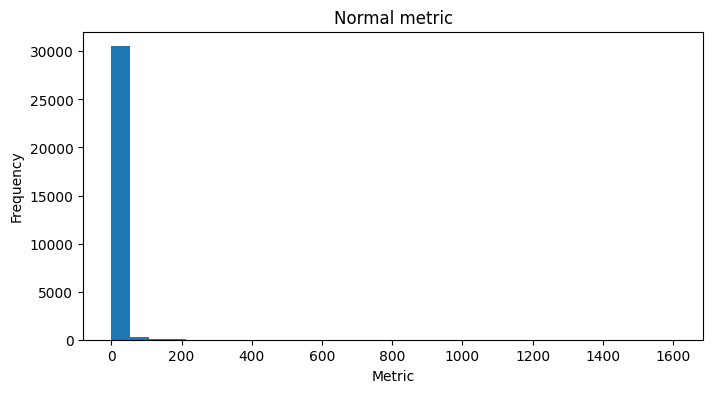

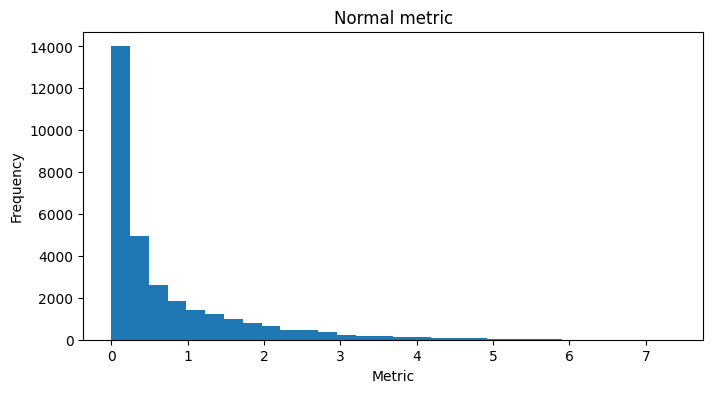

In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('df_meta_nonlog.csv')
# print(df.columns)

# Histogram
plt.figure(figsize=(8, 4))
plt.hist(df['CPV'], bins=30)
plt.title("Normal metric")
plt.xlabel("Metric")
plt.ylabel("Frequency")
plt.show()

#Log positive/left skew 
df['Cost'] = np.log1p(df['Cost'])
df['Impressions'] = np.log1p(df['Impressions'])
df['Reach'] = np.log1p(df['Reach'])
df['Frequency'] = np.log1p(df['Frequency'])
df['Actions'] = np.log1p(df['Actions'])
df['Post Engagements'] = np.log1p(df['Post Engagements'])
df['Link Clicks'] = np.log1p(df['Link Clicks'])
df['Video Completions'] = np.log1p(df['Video Completions'])
df['ThruPlay Actions'] = np.log1p(df['ThruPlay Actions'])
df['Landing Page Views'] = np.log1p(df['Landing Page Views'])
df['CPM'] = np.log1p(df['CPM'])
df['CPC'] = np.log1p(df['CPC'])
df['CPV'] = np.log1p(df['CPV'])
df['CPVC'] = np.log1p(df['CPVC'])
df['CTR'] = np.log1p(df['CTR'])
df['CPE'] = np.log1p(df['CPE'])
df['CPCV'] = np.log1p(df['CPCV'])
df['CVR'] = np.log1p(df['CVR'])

plt.figure(figsize=(8, 4))
plt.hist(df['CPV'], bins=30)
plt.title("Normal metric")
plt.xlabel("Metric")
plt.ylabel("Frequency")
plt.show()

df.to_csv('df_meta_log.csv', index=False)

# Add ROI

In [5]:
import pandas as pd
import numpy as np

google_df = pd.read_csv('df_google_log.csv')
meta_df = pd.read_csv('df_meta_log.csv')

# Define conditions
conditions = [
    google_df['Campaign Stage'] == 'Top Funnel',
    google_df['Campaign Stage'] == 'Mid Funnel',
    google_df['Campaign Stage'] == 'Bottom Funnel'
]

# Define corresponding calculations
roi_values = [
    google_df['Impressions'] / google_df['Cost'],
    google_df['Clicks'] / google_df['Cost'],
    google_df['Conversions'] / google_df['Cost']
]

# Create the Stage ROI column
google_df['Stage ROI'] = np.select(conditions, roi_values, default=np.nan)
google_df.to_csv('df_google_log_ROI.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

meta_df = pd.read_csv('df_meta_log.csv')

# Define conditions
conditions = [
    meta_df['Campaign Stage'] == 'Top Funnel',
    meta_df['Campaign Stage'] == 'Mid Funnel',
    meta_df['Campaign Stage'] == 'Bottom Funnel'
]

# Corresponding ROI calculations
roi_values = [
    meta_df['Impressions'] / meta_df['Cost'],
    meta_df['Link Clicks'] / meta_df['Cost'],
    meta_df['Landing Page Views'] / meta_df['Cost']
]

# Apply conditions
meta_df['Stage ROI'] = np.select(conditions, roi_values, default=np.nan)

print(meta_df)